<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Final-test---your-name" data-toc-modified-id="Final-test---your-name-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Final test - Mai Vu</a></span><ul class="toc-item"><li><span><a href="#Problem-1" data-toc-modified-id="Problem-1-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Problem 1</a></span></li><li><span><a href="#Problem-2" data-toc-modified-id="Problem-2-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Problem 2</a></span></li><li><span><a href="#Problem-3" data-toc-modified-id="Problem-3-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Problem 3</a></span></li><li><span><a href="#Problem-4" data-toc-modified-id="Problem-4-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Problem 4</a></span></li></ul></li></ul></div>

# Final test - Mai Vu
Probability, Statistics and Discrete Mathematics, Autumn 2019   
11.12.2019      
Helsinki Metropolia University of Applied Sciences

In [1]:
# Import necessary libraries
%pylab inline
import numpy.random as rnd
import numpy as np
import scipy.stats as stats
import pandas as pd
numpy.__version__

Populating the interactive namespace from numpy and matplotlib


'1.16.4'

## Problem 1

Here is how I solved this problem...

In [2]:
array = np.array([199.49, 199.33, 199.23, 200.01, 200.15, 199.67, 200.25, 199.51, 200.6, 199.94])
print('Array =', array)

# a - Print the average transmission time of the signal
print('\nThe average transmission time of the signal =', round(mean(array),3))

# b - Print the median value of the transmission time
print('\nThe median transmission time of the signal =', round(median(array),3))

# c - Print the variation in the data
print('\nThe variation = ', round(stats.variation(array),3))

# d - Print the max and min of values
print('\nMin value of the array =', min(array))
print('Max value of the array =', max(array))

# e - Upper and lower bounds for the mean transmission time (99% confidence on the value)
z = 2.576
print('\nLower bound for the mean transmission time (99% confidence on the value) =', round(mean(array) - z * stats.sem(array), 3))
print('Upper bound for the mean transmission time (99% confidence on the value) =', round(mean(array) + z * stats.sem(array), 3))


Array = [199.49 199.33 199.23 200.01 200.15 199.67 200.25 199.51 200.6  199.94]

The average transmission time of the signal = 199.818

The median transmission time of the signal = 199.805

The variation =  0.002

Min value of the array = 199.23
Max value of the array = 200.6

Lower bound for the mean transmission time (99% confidence on the value) = 199.457
Upper bound for the mean transmission time (99% confidence on the value) = 200.179


## Problem 2

Here is how I solved this problem...

**a + b - Generate the array and plot the density histogram of random values**



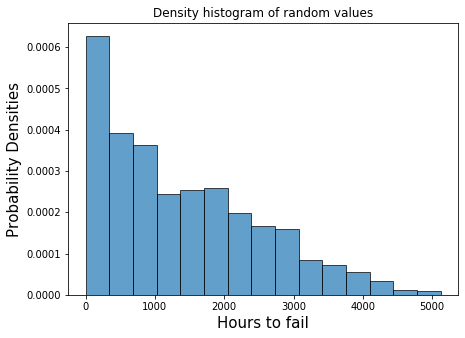

In [3]:
#Generate the array
N = 1000
a = 0.25
c = 3.0
r = stats.exponweib.rvs(a, c, scale = 3000, size = N)

#Plot the density histogram 
plt.figure(figsize = (7,5))
plt.hist(r, density = True, bins = 'auto', edgecolor = 'k', alpha = 0.7)
plt.title('Density histogram of random values')
plt.xlabel('Hours to fail', fontsize = 15)
plt.ylabel('Probability Densities', fontsize = 15)
plt.show()

**c + d + e - Calculation**

In [4]:
#c - Print the probability that system will fail before 500 hours
print('The probability that system will fail before 500 hours =', sum(r < 500)/N)

#d - Print the probability that system will fail between 500 hours and 2000 hours
print('The probability that system will fail between 500 hours and 2000 hours =', sum(np.logical_and(r > 500, r < 2000))/N)

#e - Print when 80% of the systems failed
for i in range(0, int(max(r)), 1):
    if sum(r < i)/N > 0.8:
        print('80% systems failed before', i, 'hours')
        print('The probability that system will fail before', i, 'hours =', sum(r < i)/N)
        break

The probability that system will fail before 500 hours = 0.278
The probability that system will fail between 500 hours and 2000 hours = 0.44
80% systems failed before 2421 hours
The probability that system will fail before 2421 hours = 0.801


## Problem 3

Here is how I solved this problem...

**a - Read .csv file and print a graphical plot of the heart rate**

In [5]:
# Read file
X = pd.read_csv('heartrate.csv', index_col = 'time')
X.sample(10)

,polar,garmin,firstbeat,cosinuss
time,,,,
1648,139.0,135.0,136.0,105.0
1765,141.0,138.0,142.0,140.0
1540,122.0,120.0,122.0,123.0
1239,162.0,162.0,161.0,162.0
1270,164.0,163.0,163.0,162.0
1568,122.0,121.0,120.0,121.0
851,132.0,114.0,130.0,134.0
1108,118.0,114.0,117.0,68.0
765,135.0,138.0,135.0,134.0


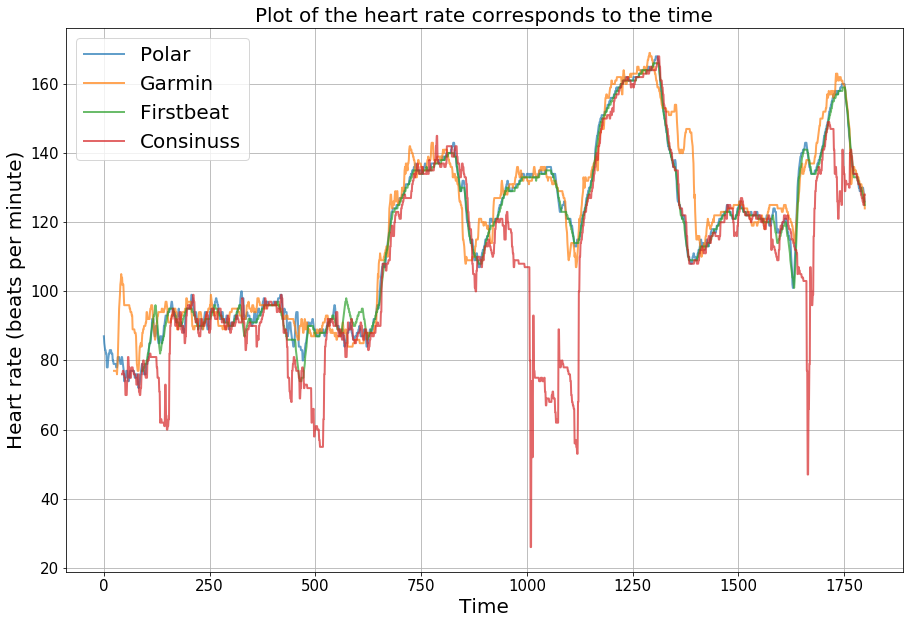

In [6]:
#Print plot
plt.figure(figsize = (15,10))
plt.plot(X['polar'], label = 'Polar', linewidth = 2, alpha = 0.7)
plt.plot(X['garmin'], label = 'Garmin',linewidth = 2, alpha = 0.7)
plt.plot(X['firstbeat'], label = 'Firstbeat', linewidth = 2, alpha = 0.7)
plt.plot(X['cosinuss'], label = 'Consinuss', linewidth = 2, alpha = 0.7)
plt.xlabel('Time', fontsize = 20)
plt.ylabel('Heart rate (beats per minute)', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.title('Plot of the heart rate corresponds to the time', fontsize = 20)
plt.grid()
plt.legend(prop={'size': 20})
plt.show()

**b - Make histogram plot**

In [7]:
bins_min = int(min(min(X['polar']), min(X['garmin']), min(X['firstbeat']), min(X['cosinuss']))) - 1
bins_max = int(max(max(X['polar']), max(X['garmin']), max(X['firstbeat']), max(X['cosinuss']))) + 1
bins = arange(bins_min - 1, bins_max + 1, 10)

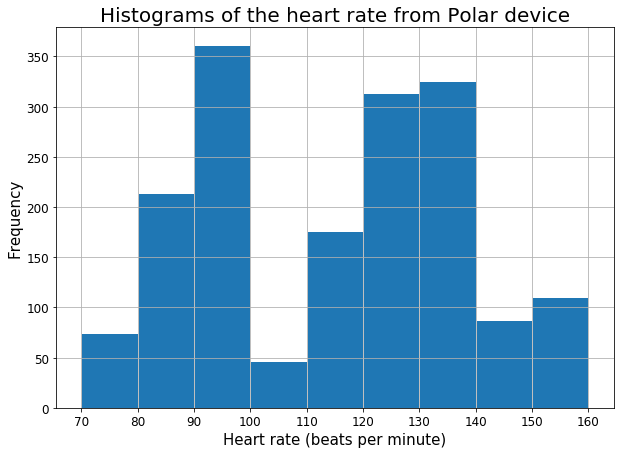

In [8]:
#Plot for Polar device
plt.figure(figsize = (10,7))
plt.hist(X['polar'], bins, edgecolor='w')
plt.title('Histograms of the heart rate from Polar device', fontsize = 20)
plt.xlabel('Heart rate (beats per minute)', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.xticks(np.arange(70,170, 10), fontsize = 12)
plt.yticks(fontsize = 12)
plt.grid()
plt.show()

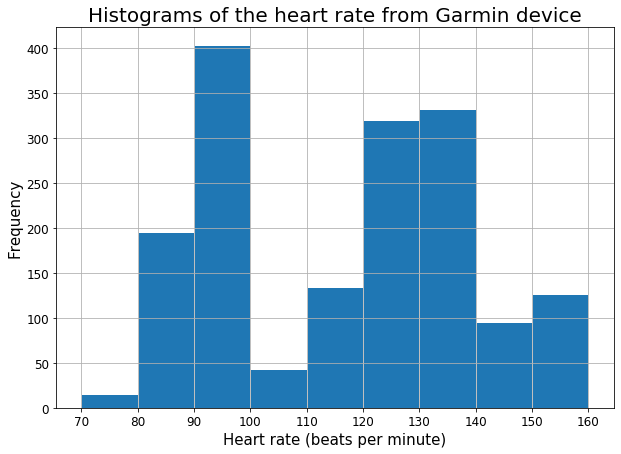

In [9]:
#Plot for Garmin device
plt.figure(figsize = (10,7))
plt.hist(X['garmin'], bins, edgecolor='w')
plt.title('Histograms of the heart rate from Garmin device', fontsize = 20)
plt.xlabel('Heart rate (beats per minute)', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.xticks(np.arange(70,170, 10), fontsize = 12)
plt.yticks(fontsize = 12)
plt.grid()
plt.show()

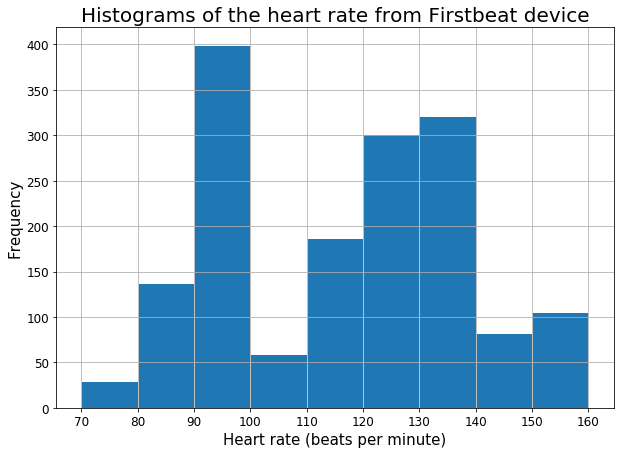

In [10]:
#Plot for Firstbeat device
plt.figure(figsize = (10,7))
plt.hist(X['firstbeat'], bins, edgecolor='w')
plt.title('Histograms of the heart rate from Firstbeat device', fontsize = 20)
plt.xlabel('Heart rate (beats per minute)', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.xticks(np.arange(70,170, 10), fontsize = 12)
plt.yticks(fontsize = 12)
plt.grid()
plt.show()

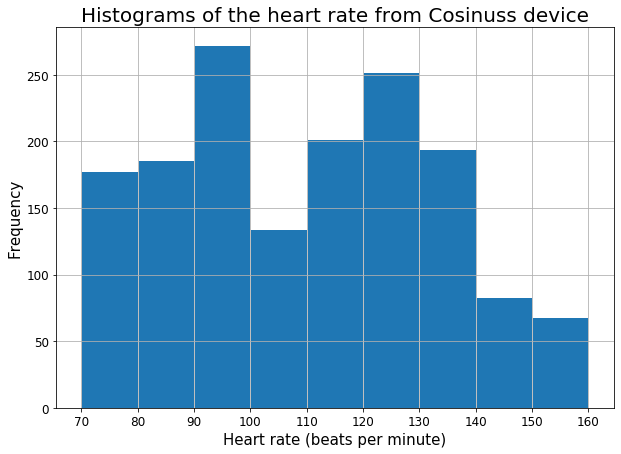

In [11]:
#Plot for Consinuss device
plt.figure(figsize = (10,7))
plt.hist(X['cosinuss'], bins, edgecolor='w')
plt.title('Histograms of the heart rate from Cosinuss device', fontsize = 20)
plt.xlabel('Heart rate (beats per minute)', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.xticks(np.arange(70,170, 10), fontsize = 12)
plt.yticks(fontsize = 12)
plt.grid()
plt.show()

**c - Calculate the descriptive statistics for the heart rate for each device**

In [12]:
X.describe(include = 'all')

,polar,garmin,firstbeat,cosinuss
count,1800.000000,1776.000000,1710.000000,1757.000000
mean,116.662778,119.269707,118.097661,109.077974
std,24.420946,24.159724,23.337284,27.210124
min,72.000000,76.000000,74.000000,26.000000
25%,93.000000,94.000000,94.000000,89.000000
50%,120.000000,123.000000,121.000000,110.000000
75%,134.000000,136.000000,134.000000,128.000000
max,168.000000,169.000000,166.000000,168.000000


**d - Calculate the correlation coefficients between each device pair**

In [13]:
#Print the correlation coefficients for all features (pearson method)
corr = X.corr()
print(corr)

              polar    garmin  firstbeat  cosinuss
polar      1.000000  0.962751   0.995772  0.800910
garmin     0.962751  1.000000   0.963841  0.797862
firstbeat  0.995772  0.963841   1.000000  0.792509
cosinuss   0.800910  0.797862   0.792509  1.000000


**e - Scatter plot with regression for each device pair**

G:\Anaconda\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
G:\Anaconda\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


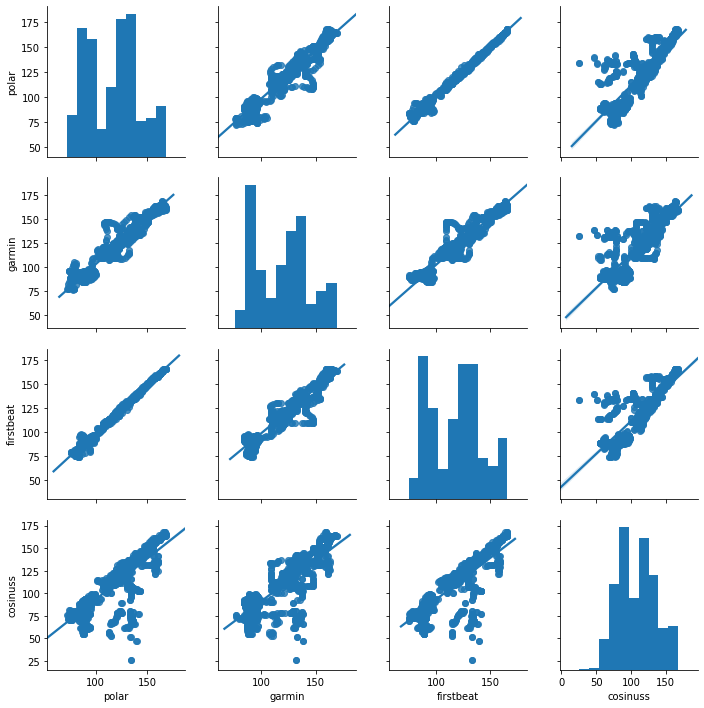

In [14]:
import seaborn as sns
#Pair plot for 4 features with regression line
pp = sns.pairplot(X, vars=['polar', 'garmin','firstbeat','cosinuss'], kind="reg")
plt.show(pp)

## Problem 4

a) I would say the typical heart rate is about 95 beats per minute. According to 4 histograms plot of hear rate for 4 devices, the largest set of distributions is from 90 to 100 for all 4. So that would be the typical heart rate (the mode I believe). I calculate the mean so the answer is 95 beats per minute.<br>
b) From the descriptive statistics table or the graphical plot, the heat rate range for the first 3 devices is almost the same: polar: [72, 168], garmin: [76, 169], fristbeat: [74, 166]. However, the last device range is from 26 to 168. I think there is outlier in the dataset (It would needed more calculation, checking the value is smaller than the mean - 3 * std or z-score).<br>
c) Well, as I said, there might be outlier(s) in the dataset. Also, I checked the 10 samples from the dataset and saw some NaN value. Overall, to me, it is still reliable, especially the first 3 devices, but more cleaning would be better.<br>
d) According to histograms, I would rank the frist 2 devices are better than the third one and the last one would be the worse.<br>
e) It is interesting and also a little bit confusing answering this question. I believe this is discrete distributions. However, as their shapes are not fit into any type of discrete distributions so my answer is only discrete distribution.